In [1]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords, words
import pandas as pd
import matplotlib.pyplot as plt

# Download necessary NLTK packages
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Category,Text
0,Accountant,education omba executive leadership university...
1,Accountant,howard gerrard accountant deyjobcom birmingham...
2,Accountant,kevin frank senior accountant inforesumekraftc...
3,Accountant,place birth nationality olivia ogilvy accounta...
4,Accountant,stephen greet cpa senior accountant 9 year exp...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13389 entries, 0 to 13388
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  13389 non-null  object
 1   Text      13389 non-null  object
dtypes: object(2)
memory usage: 209.3+ KB


In [4]:
# df.drop(columns = 'Resume_html', inplace = True) # inplace = True -> drop the 'Resume_html' column directly from the DataFrame without creating a copy
# df.head()

,ID,Resume_str,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR


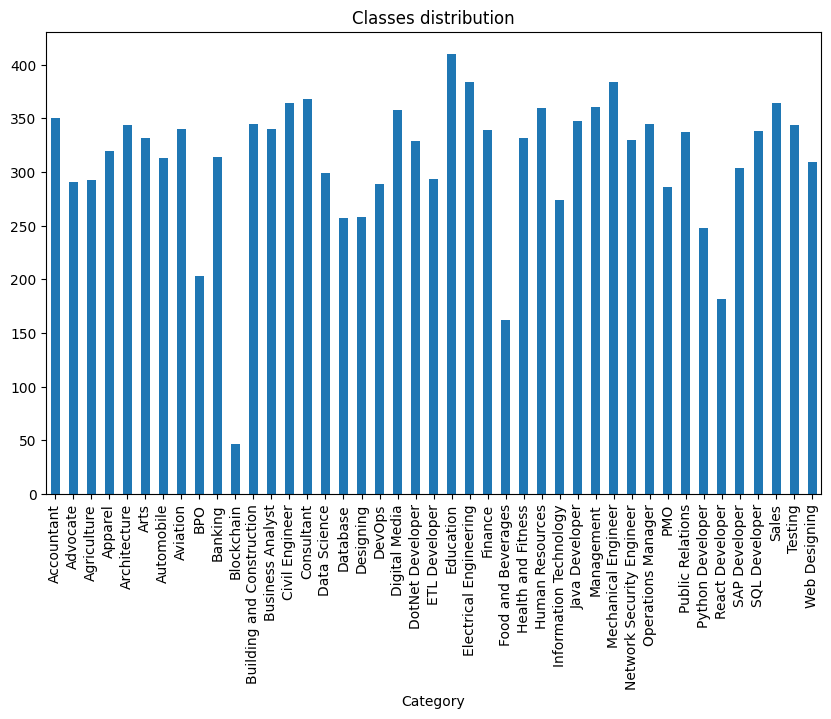

In [5]:
df['Category'].value_counts().sort_index().plot(kind='bar', title='Classes distribution', figsize=(10,6))
plt.show()

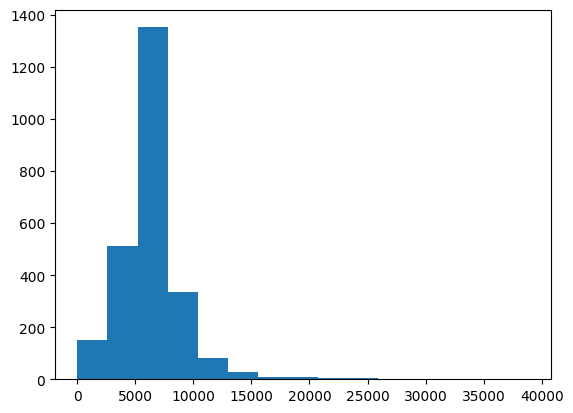

In [6]:
# Create a histogram to visualize how the lengths of resumes (in number of characters) are distributed
plt.hist([len(x) for x in df.Resume_str], bins = 15)
plt.show()

## Preprocessing

In [7]:
# Get the list of valid English words
english_vocab = set(words.words())

# Initialize the stemmer
stemmer = PorterStemmer()

In [8]:
def clean_text(text):
    """
    Cleans the text by removing special characters, and extra spaces.
    """
    text = re.sub(r'[^\w\s]', '', text)  # Removes special characters
    text = ' '.join(text.split())  # Removes extra spaces
    return text

### Lemmatization Process

Lemmatization is the process of reducing a word to its base or root form (called a **lemma**). Unlike stemming, which cuts off prefixes or suffixes to create a root word, lemmatization considers the word's meaning and grammar, ensuring the result is a valid word in the dictionary.

#### Example:
- **Running** → **Run**
- **Better** → **Good**
- **Cats** → **Cat**

Lemmatization improves text analysis by ensuring that variations of the same word (like "run", "running", and "runner") are treated as the same word, helping to reduce the dimensionality of the data and improving the accuracy of natural language processing (NLP) models.

In [9]:
# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    """
    Lemmatizes the tokens (words) using NLTK's lemmatizer.
    """
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [10]:
# Function to stem tokens
def stem_tokens(tokens):
    """
    Stems the tokens (words) using NLTK's PorterStemmer.
    """
    return [stemmer.stem(token) for token in tokens]

In [11]:
# Function to remove non-English words
def remove_non_english(tokens):
    """
    Filters out tokens that are not valid English words.
    """
    return [token for token in tokens if token.lower() in english_vocab]

In [12]:
def preprocess_text(text):
    """
    Preprocesses the text: cleans, tokenizes, and lemmatizes.
    """
    # Clean the text
    text = clean_text(text)
    
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove non-English words
    # tokens = remove_non_english(tokens)
    
    # Lemmatize the tokens
    # tokens = lemmatize_tokens(tokens)

    # Stem the tokens
    tokens = stem_tokens(tokens)
    
    return ' '.join(tokens)

In [13]:
df['Resume_str'] = df['Resume_str'].apply(preprocess_text)

In [14]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [15]:
count_vect = CountVectorizer(
    stop_words = list(stopwords),
    # ngram_range=(1, 2), # Considers unigrams and bigrams
)

### What does `ngram_range=(1, 2)` mean?
In practice, if your text is: **"The quick brown fox"**, the generated n-grams will be:

- **Unigrams**: "the", "quick", "brown", "fox"  
- **Bigrams**: "the quick", "quick brown", "brown fox"

This allows you to capture both individual words (unigrams) and combinations of consecutive words (bigrams), thereby enriching the model with additional contextual information.


In [16]:
Resume_vector = count_vect.fit_transform(df.Resume_str)
Resume_vector # Resume_vector is the sparse matrix that contains the bag-of-words representation of the input text data. 
              # It represents the counts of words in the documents.

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 720176 stored elements and shape (2484, 42609)>

In [17]:
# Ottieni le parole del vocabolario come intestazioni di colonna
feature_names = count_vect.get_feature_names_out()

# Crea DataFrame leggibile
Resume_df = pd.DataFrame(Resume_vector.toarray(), columns=feature_names)

# Visualizza la tabella
print(Resume_df.head())

   00  000  0000  00001  001  0018  002  002828a  00296190  003  ...  µpg  \
0   0    0     0      0    0     0    0        0         0    0  ...    0   
1   0    0     0      0    0     0    0        0         0    0  ...    0   
2   0    0     0      0    0     0    0        0         0    0  ...    0   
3   0    0     0      0    0     0    0        0         0    0  ...    0   
4   0    0     0      0    0     0    0        0         0    0  ...    0   

   âadvanc  çatalhöyük  école  ética  étiquett  éxito  òwaterfalló  último  \
0        0           0      0      0         0      0            0       0   
1        0           0      0      0         0      0            0       0   
2        0           0      0      0         0      0            0       0   
3        0           0      0      0         0      0            0       0   
4        0           0      0      0         0      0            0       0   

   ﬁlm  
0    0  
1    0  
2    0  
3    0  
4    0  

[5 rows x 426

In [18]:
# When we use CountVectorizer and call fit_transform() on our text data, it creates a vocabulary, i.e., a list of all unique words present in our documents.
# The dictionary returned by vocabulary_ maps each word to a numeric index that represents its column position in the resulting sparse matrix of word counts.
vocabulary = count_vect.vocabulary_
vocabulary

{'hr': 19622,
 'administratormarket': 4689,
 'associ': 6480,
 'administr': 4637,
 'summari': 37266,
 'dedic': 12862,
 'custom': 12290,
 'servic': 34960,
 'manag': 24108,
 '15': 1136,
 'year': 42355,
 'experi': 15968,
 'hospit': 19524,
 'respect': 33079,
 'builder': 8567,
 'leader': 22904,
 'customerfocus': 12303,
 'team': 38005,
 'strive': 37009,
 'instil': 20888,
 'share': 35148,
 'enthusiast': 15298,
 'commit': 10835,
 'highlight': 19191,
 'focus': 16980,
 'satisfact': 34197,
 'market': 24497,
 'savvi': 34245,
 'conflict': 11161,
 'resolut': 33047,
 'techniqu': 38102,
 'train': 39082,
 'develop': 13289,
 'skill': 35620,
 'multitask': 26295,
 'client': 10319,
 'relat': 32685,
 'specialist': 36228,
 'accomplish': 4284,
 'missouri': 25643,
 'dot': 14010,
 'supervisor': 37365,
 'certif': 9593,
 'certifi': 9595,
 'ihg': 20191,
 'loyalti': 23684,
 'segment': 34675,
 'hilton': 19266,
 'worldwid': 42000,
 'gener': 17781,
 'trainer': 39091,
 'cross': 12002,
 'server': 34928,
 'system': 37634,

In [19]:
print(f'The vocabulary contains {len(vocabulary)} terms in total')

The vocabulary contains 42609 terms in total


In [20]:
# It returns the unique words (tokens) in the vocabulary, in the order they appear in the matrix of word counts created by fit_transform()
tokens = count_vect.get_feature_names_out()

In [21]:
tokens[:100]

array(['00', '000', '0000', '00001', '001', '0018', '002', '002828a',
       '00296190', '003', '00313355', '00325910', '0039', '005', '009891',
       '01', '010714', '010715', '011014032014', '0110486', '0111',
       '01122007', '011415', '011971', '011975', '011977', '011979',
       '011980', '011981', '011982', '011983', '011984', '011985',
       '011986', '011987', '011988', '011989', '011990', '011991',
       '011991051991', '011992', '011993', '011994', '011995', '011996',
       '011997', '011998', '011999', '012000', '012001', '012002',
       '012003', '012004', '012005', '012006', '012007', '012008',
       '012009', '012010', '012011', '012011052014', '012012', '012013',
       '012014', '012014032014', '012015', '012016', '012017', '012018',
       '012019', '012020', '012021', '012022', '01207673477', '012312',
       '013', '013111', '018', '01810', '01900593', '02', '0201',
       '020304021604', '020312', '02052014', '02052022', '021',
       '02102008092208', '021

In [22]:
tokens[10000:10100]

array(['chong', 'choos', 'chop', 'chopticon', 'choral', 'chorda',
       'chordiant', 'chore', 'choreograph', 'choreographi', 'choropleth',
       'choru', 'chose', 'chosen', 'chpa', 'chq', 'chri', 'chrisel',
       'chrisley', 'christ', 'christi', 'christian', 'christianson',
       'christin', 'christina', 'christma', 'christmasnew', 'christoph',
       'christophereklickmilmailmil', 'chro', 'chromalloy', 'chromatin',
       'chromatograph', 'chromatographi', 'chrome', 'chromeo', 'chromic',
       'chronic', 'chronicl', 'chrono', 'chronolog', 'chrp',
       'chrysanthemum', 'chrysler', 'chryslerdodgejeep', 'chst', 'chubb',
       'chuck', 'chuhsiang', 'chula', 'chulalongkorn', 'chungho',
       'chunwei', 'church', 'churchil', 'churchush', 'churn', 'chute',
       'chutney', 'chv', 'chyron', 'chávez', 'ci', 'cia', 'cialdini',
       'ciam', 'ciap', 'cib', 'ciba', 'cibavis', 'cibolo', 'ciboodl',
       'cic', 'cicso', 'cid', 'cidar', 'cidr', 'cie', 'ciencia',
       'ciesiolka', 'ciet

In [23]:
tokens[-100:]

array(['zell', 'zellman', 'zemax', 'zen', 'zendesk', 'zeneca', 'zenefit',
       'zenger', 'zenit', 'zenith', 'zenmap', 'zenobi', 'zenwork',
       'zephyrhil', 'zero', 'zerobas', 'zerocoupon', 'zeroreduc',
       'zerotoler', 'zeta', 'zetia', 'zf', 'zhang', 'zhejiang',
       'zhengxin', 'zicklin', 'ziff', 'zig', 'zigga', 'ziglar', 'zigzag',
       'zillibellini', 'zilliontv', 'zillowcom', 'zimbabw', 'zimbabwean',
       'zimmer', 'zimmerman', 'zinc', 'zion', 'zip', 'zipcod', 'zipper',
       'zirku', 'zithromax', 'zo', 'zodiac', 'zoe', 'zoho', 'zoloft',
       'zombi', 'zonal', 'zone', 'zone2004', 'zone2005', 'zone2006',
       'zonescontain', 'zonesjob', 'zoo', 'zookeep', 'zoolog', 'zoom',
       'zoonot', 'zooscreat', 'zoosencourag', 'zooshelp', 'zoosmaintain',
       'zoosupheld', 'zpro', 'zs', 'zse510', 'zse520', 'zti', 'ztrack',
       'ztv', 'zuckerman', 'zumba', 'zumbathon', 'zumbaâ', 'zumper',
       'zurich', 'zvm', 'zx', 'zxx', 'zynex', 'zynx', 'zypher', 'zyrtec',
       'z

How we can see, there are many tokens that are meaningless. To resolve this problem, we can:
- use an aggressive preprocessing approach -> remove numbers and special characters.

- use `max_df`: Exclude words that appear in more than a specified percentage of documents (e.g., `max_df=0.85` excludes words in more than 85% of documents).

- use `min_df`: Exclude words that appear in fewer than a specified number of documents (e.g., `min_df=2` excludes words that appear in fewer than 2 documents).

- use `max_features`: Limit the number of features (words) to the most frequent ones (e.g., `max_features=1000` limits to the 1000 most frequent words).

In [24]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(Resume_vector)

X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 720176 stored elements and shape (2484, 42609)>